# MovieLens 1M EDA
## Arati Santhanakrishnan
### Sep 16, 2022

The MovieLens-100K dataset is explored. 

Citation: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History
and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4,
Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872

Insert path here: (excluding file names)

In [148]:
path_name = '/Users/aratisanthanakrishnan/Documents/MovieLens-temp/data/ml-100k/'

## Importing libraries and loading data

In [149]:
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df_ratings = pd.read_csv(path_name+'u.data',sep = '\t',header =None )

In [152]:
df_ratings.columns = ['User_id','Item_id','Rating','Timestamp']
df_ratings.head()

,User_id,Item_id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [154]:
df_ratings.info(), df_ratings.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   User_id    100000 non-null  int64
 1   Item_id    100000 non-null  int64
 2   Rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


(None, (100000, 4))

In [12]:
df_users = pd.read_csv(path_name+'users.dat',sep = '::',header =None )
df_users.columns = ['User_id','Gender','Age','Occupation','Zipcode']
df_users.head()

,User_id,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_id     6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


Loading movies data

### MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [17]:
df_movies = pd.read_csv(path_name+'movies.dat',sep = '::',header=None, encoding='ISO-8859-1')
df_movies.columns = ['Item_id','Title','Genre']
df_movies.head()

,Item_id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


The title column appears to include the year it was released in parantheses, and Genre is a list rather than single value, as a movie can belong to several genres. 

There may be a relationship to the age of the user, and whether they are inclined to watch an older omvie. 

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item_id  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genre    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


## Pre-processing

1. Movie ids are cleaned up - year is parsed from title, duplicates are checked for, and genre column is made into dummies rather than a list. 
2. checked number of digits on zip code in user data, mapped to state? 
3. joined user and movie data to ratings data. 
4. size of dataset is checked. 

In [20]:
df_movies.head()

,Item_id,Title,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
## checking for duplicates
any(df_movies['Item_id'].value_counts()>1), len(df_movies['Item_id'].unique())

(False, 3883)

Movie ids are not duplicated. Let's check if there are title repeats. 

In [26]:
any(df_movies['Title'].value_counts()>1), len(df_movies['Title'].unique())

(False, 3883)

Titles are not repeated either. There is a one-to-one relationship between Title and Item_id. 

Now the title column is parsed for year and title. 

In [35]:
# checking if all rows have open and closing brackets
df_movies.loc[(df_movies['Title'].str.contains('(',regex=False)) &
              (df_movies['Title'].str.contains(')',regex=False)),:].shape

(3883, 3)

In [43]:
df_movies['Year'] = df_movies['Title'].str.extract(r'(\([0-9]{4}\))')

In [44]:
df_movies.head()

,Item_id,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


In [46]:
df_movies['Year'] = df_movies['Year'].apply(lambda x: x[1:-1]).astype(int)
df_movies.head()

,Item_id,Title,Genre,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [52]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Item_id       3883 non-null   int64 
 1   Title         3883 non-null   object
 2   Genre         3883 non-null   object
 3   Year          3883 non-null   int64 
 4   Title_noyear  0 non-null      object
dtypes: int64(2), object(3)
memory usage: 151.8+ KB


In [87]:
df_movies['Title_noyear'] = df_movies['Title'].str.extract(r'([^(]*)')
df_movies['Title_noyear'].astype(str).str.rstrip()
df_movies.head()

,Item_id,Title,Genre,Year,Title_noyear
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II


In [104]:
# parsing sequels.
df_movies[#(df_movies['Title_noyear'].str.contains(r'(II)')) |
         #(df_movies['Title_noyear'].str.contains(r'(IV)')) |
         (df_movies['Title_noyear'].str.contains(r'(VI)'))]

,Item_id,Title,Genre,Year,Title_noyear
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,1983,Star Wars: Episode VI - Return of the Jedi
1351,1372,Star Trek VI: The Undiscovered Country (1991),Action|Adventure|Sci-Fi,1991,Star Trek VI: The Undiscovered Country
1910,1979,Friday the 13th Part VI: Jason Lives (1986),Horror,1986,Friday the 13th Part VI: Jason Lives
1911,1980,Friday the 13th Part VII: The New Blood (1988),Horror,1988,Friday the 13th Part VII: The New Blood
1912,1981,Friday the 13th Part VIII: Jason Takes Manhatt...,Horror,1989,Friday the 13th Part VIII: Jason Takes Manhattan


Creating dummies for genres:

In [105]:
df_movies['Genre_list'] = df_movies['Genre'].apply(lambda x: x.split('|'))
df_movies.head()

,Item_id,Title,Genre,Year,Title_noyear,Genre_list
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,[Comedy]


In [118]:
genre_dummies = pd.get_dummies(df_movies['Genre_list'].explode(),prefix='genre').reset_index().groupby('index').sum()
genre_dummies.head()

,genre_Action,genre_Adventure,genre_Animation,genre_Children's,genre_Comedy,genre_Crime,genre_Documentary,genre_Drama,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
index,,,,,,,,,,,,,,,,,,
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Spot checking shows that the multi-hot dummies are correctly created. joining to movie data.

In [121]:
df_movies = pd.merge(df_movies,genre_dummies,left_index=True,right_index=True)

In [122]:
df_movies.head()

,Item_id,Title,Genre,Year,Title_noyear,Genre_list,genre_Action,genre_Adventure,genre_Animation,genre_Children's,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,"[Animation, Children's, Comedy]",0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji,"[Adventure, Children's, Fantasy]",0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,"[Comedy, Romance]",0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale,"[Comedy, Drama]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,[Comedy],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Checking zipcodes on user data to be the same number of digits:

In [123]:
df_users.head()

,User_id,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [127]:
df_users['Zipcode'] = df_users['Zipcode'].astype(str)

0       48067
1       70072
2       55117
3       02460
4       55455
        ...  
6035    32603
6036    76006
6037    14706
6038    01060
6039    11106
Name: Zipcode, Length: 6040, dtype: object

In [129]:
df_users[df_users['Zipcode'].apply(len)!=5]

,User_id,Gender,Age,Occupation,Zipcode
160,161,M,45,16,98107-2117
232,233,F,45,20,37919-4204
292,293,M,56,1,55337-4056
457,458,M,50,16,55405-2546
505,506,M,25,16,55103-1006
...,...,...,...,...,...
5681,5682,M,18,0,23455-4959
5903,5904,F,45,12,954025
5924,5925,F,25,0,90035-4444
5966,5967,M,50,16,73069-5429


Granularity differs row to row for zipcode. 

In [131]:
df_users.head()

,User_id,Gender,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
combining all tables:

In [133]:
df1M = pd.merge(df_ratings,df_users,how='left',left_on = 'User_id',right_on = 'User_id')
df1M.head()

,User_id,Item_id,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [134]:
df1M = pd.merge(df1M,df_movies,how='left',left_on = 'Item_id',right_on = 'Item_id')

In [135]:
df1M.head()

,User_id,Item_id,Rating,Timestamp,Gender,Age,Occupation,Zipcode,Title,Genre,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df1M.shape, df1M.size/10**6

((1000209, 31), 31.006479)

<AxesSubplot:>

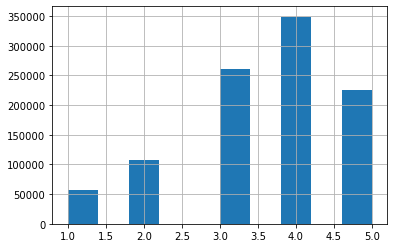

In [139]:
df1M['Rating'].hist()

How do different users rate? 

descriptive statistics of each users ratings are computed: 

In [141]:
occ_dict = {
0: "other", 
1: "academic/educator",
2: "artist",
3: "clerical/admin",
4: "college/grad student",
5: "customer service",
6: "doctor/health care",
7: "executive/managerial",
8: "farmer",
9: "homemaker",
10: "K-12 student",
11: "lawyer",
12: "programmer",
13: "retired",
14: "sales/marketing",
15: "scientist",
16: "self-employed",
17: "technician/engineer",
18: "tradesman/craftsman",
19: "unemployed",
20: "writer"
}

In [142]:
df1M['Occupation'] = df1M['Occupation'].map(occ_dict)

In [144]:
df1M.head()

,User_id,Item_id,Rating,Timestamp,Gender,Age,Occupation,Zipcode,Title,Genre,...,genre_Fantasy,genre_Film-Noir,genre_Horror,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Thriller,genre_War,genre_Western
0,1,1193,5,978300760,F,1,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,F,1,K-12 student,48067,James and the Giant Peach (1996),Animation|Children's|Musical,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,F,1,K-12 student,48067,My Fair Lady (1964),Musical|Romance,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,F,1,K-12 student,48067,Erin Brockovich (2000),Drama,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,F,1,K-12 student,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,...,0,0,0,0,0,0,0,0,0,0


In [146]:
ratingagg_byuser = df1M.groupby('User_id')['Rating'].describe()
ratingagg_byuser.head(10)

,count,mean,std,min,25%,50%,75%,max
User_id,,,,,,,,
1,53.0,4.188679,0.680967,3.0,4.0,4.0,5.0,5.0
2,129.0,3.713178,1.001513,1.0,3.0,4.0,5.0,5.0
3,51.0,3.901961,0.984985,1.0,3.0,4.0,5.0,5.0
4,21.0,4.190476,1.077917,1.0,4.0,4.0,5.0,5.0
5,198.0,3.146465,1.132699,1.0,2.0,3.0,4.0,5.0
6,71.0,3.901408,0.830747,1.0,3.0,4.0,4.0,5.0
7,31.0,4.322581,0.747757,3.0,4.0,4.0,5.0,5.0
8,139.0,3.884892,0.925321,2.0,3.0,4.0,5.0,5.0
9,106.0,3.735849,0.820010,2.0,3.0,4.0,4.0,5.0


In [147]:
ratingagg_bymovie = df1M.groupby('Item_id')['Rating'].describe()
ratingagg_bymovie.head(10)

,count,mean,std,min,25%,50%,75%,max
Item_id,,,,,,,,
1,2077.0,4.146846,0.852349,1.0,4.0,4.0,5.0,5.0
2,701.0,3.201141,0.983172,1.0,3.0,3.0,4.0,5.0
3,478.0,3.016736,1.071712,1.0,2.0,3.0,4.0,5.0
4,170.0,2.729412,1.013381,1.0,2.0,3.0,3.0,5.0
5,296.0,3.006757,1.025086,1.0,2.0,3.0,4.0,5.0
6,940.0,3.878723,0.934588,1.0,3.0,4.0,5.0,5.0
7,458.0,3.410480,0.979918,1.0,3.0,3.0,4.0,5.0
8,68.0,3.014706,0.954059,1.0,2.0,3.0,4.0,5.0
9,102.0,2.656863,1.048290,1.0,2.0,3.0,3.0,5.0
